<a href="https://colab.research.google.com/github/Nasrulpandud/Python_Image-Classification/blob/main/Image%20Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [92]:
ls

dataset/  nnmodel_scene/  Untitled0.ipynb


In [93]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [94]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [95]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [96]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [97]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [98]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [100]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.12, shuffle=True)
print(trainX.shape)
print(testX.shape)

(514, 240, 240, 3)
(71, 240, 240, 3)


In [101]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(8, (3,3), activation='relu', input_shape=(240,240,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 238, 238, 8)       224       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 119, 119, 8)       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 117, 117, 16)      1168      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 26, 26, 64)      

In [102]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
17/17 [==============================] - 16s 958ms/step - loss: 1.6144 - accuracy: 0.1751 - val_loss: 1.6101 - val_accuracy: 0.1268
Epoch 2/25
17/17 [==============================] - 16s 951ms/step - loss: 1.5839 - accuracy: 0.2257 - val_loss: 1.5483 - val_accuracy: 0.3521
Epoch 3/25
17/17 [==============================] - 16s 950ms/step - loss: 1.5248 - accuracy: 0.3638 - val_loss: 1.4714 - val_accuracy: 0.3380
Epoch 4/25
17/17 [==============================] - 16s 957ms/step - loss: 1.3640 - accuracy: 0.3794 - val_loss: 1.2737 - val_accuracy: 0.3944
Epoch 5/25
17/17 [==============================] - 16s 960ms/step - loss: 1.2658 - accuracy: 0.4358 - val_loss: 1.1361 - val_accuracy: 0.4507
Epoch 6/25
17/17 [==============================] - 16s 951ms/step - loss: 1.2103 - accuracy: 0.4805 - val_loss: 1.1188 - val_accuracy: 0.5915
Epoch 7/25
17/17 [==============================] - 16s 950ms/step - loss: 1.1135 - accuracy: 0.5233 - val_loss: 1.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


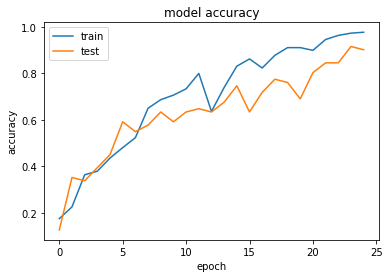

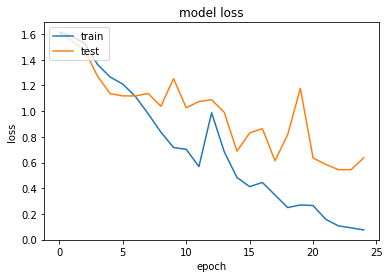

In [103]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [104]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.94      1.00      0.97        15
      GMB_03       1.00      0.84      0.91        19
      GMB_05       0.67      0.89      0.76         9
      GMB_07       0.88      0.94      0.91        16
      GMB_09       1.00      0.83      0.91        12

    accuracy                           0.90        71
   macro avg       0.90      0.90      0.89        71
weighted avg       0.92      0.90      0.90        71



In [105]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets
